In [1]:
using RCall
using DataFrames

INFO: Precompiling module RCall.
ERROR: LoadError: LoadError: Could not find R installation. Either set the "R_HOME" environmental variable, or ensure the R executable is available in "PATH".
Stacktrace:
 [1] locate_Rhome_libR() at /Users/jrising/.julia/v0.6/RCall/src/setup.jl:118
 [2] include_from_node1(::String) at ./loading.jl:576
 [3] include(::String) at ./sysimg.jl:14
 [4] include_from_node1(::String) at ./loading.jl:576
 [5] include(::String) at ./sysimg.jl:14
 [6] anonymous at ./<missing>:2
while loading /Users/jrising/.julia/v0.6/RCall/src/setup.jl, in expression starting on line 121
while loading /Users/jrising/.julia/v0.6/RCall/src/RCall.jl, in expression starting on line 41


LoadError: [91mFailed to precompile RCall to /Users/jrising/.julia/lib/v0.6/RCall.ji.[39m

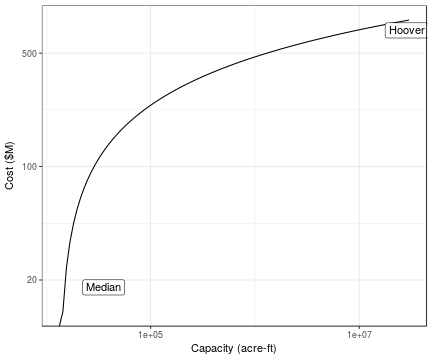

RCall.RObject{RCall.VecSxp}


In [17]:
df = DataFrame(capacity=exp.(linspace(9.5, log(30000000), 100)))
df[:cost] = exp.(0.7 + 0.9 * log.((log.(df[:capacity]) - 9.5) / 0.01))

knowns = DataFrame(capacity=[28537000, 35500], cost=[690, 18], label=["Hoover", "Median"])

R"library(ggplot2)"
R"ggplot($df, aes(capacity, cost)) + geom_line() + geom_label(data=$knowns, aes(label=label)) + scale_x_log10() + scale_y_log10(breaks=c(20, 100, 500)) + theme_bw() + xlab('Capacity (acre-ft)') + ylab('Cost ($M)')"

In [21]:
df[:marginal] = df[:cost] .* 0.9 .* (1 ./ df[:capacity]) ./ ((log.(df[:capacity]) - 9.5) / 0.01)

100-element DataArrays.DataArray{Float64,1}:
 NaN          
   0.000102193
   8.81992e-5 
   7.83437e-5 
   7.04139e-5 
   6.36965e-5 
   5.78556e-5 
   5.26986e-5 
   4.81004e-5 
   4.39725e-5 
   4.02489e-5 
   3.68776e-5 
   3.38168e-5 
   ⋮          
   7.41086e-8 
   6.84741e-8 
   6.32687e-8 
   5.84598e-8 
   5.40171e-8 
   4.99126e-8 
   4.61205e-8 
   4.26169e-8 
   3.938e-8   
   3.63893e-8 
   3.36261e-8 
   3.10731e-8 

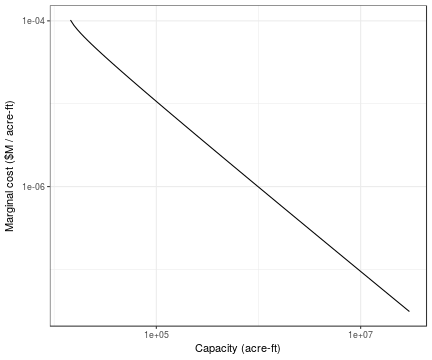

RCall.RObject{RCall.VecSxp}


In [22]:
R"ggplot($df, aes(capacity, marginal)) + geom_line() + scale_x_log10() + scale_y_log10() + theme_bw() + xlab('Capacity (acre-ft)') + ylab('Marginal cost ($M / acre-ft)')"